# we saw that kmeans and mean-shift algorithms have some problems with datasets that have various densities and with datasets that are not spherical 
# dbscan is a density-based algorithm that can handle these problems

# it has 2 parameters :
# 1.eps: uses elbow method
# 2.minPts >= D(dimension) + 1,     minPts==1 doesn't make sense, 2 is also not good, 3 would be good for a minimal.
# for data with a lot of outliers, the bigger the minPts the better they would be detecrted 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd     
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_customers.csv')
print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = df.iloc[:, [3, 4]].values
print(df.shape)
df[:5]

(200, 2)


array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

<Axes: >

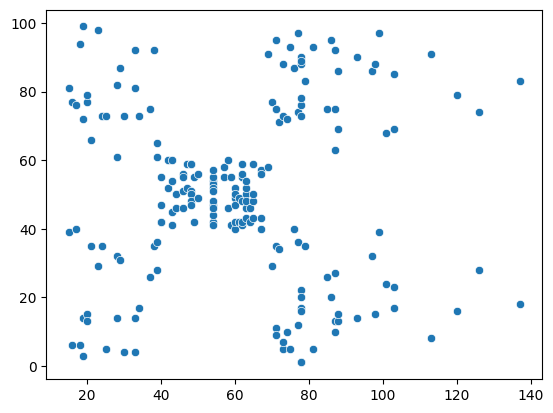

In [6]:
sns.scatterplot(x=df[:, 0], y=df[:, 1])

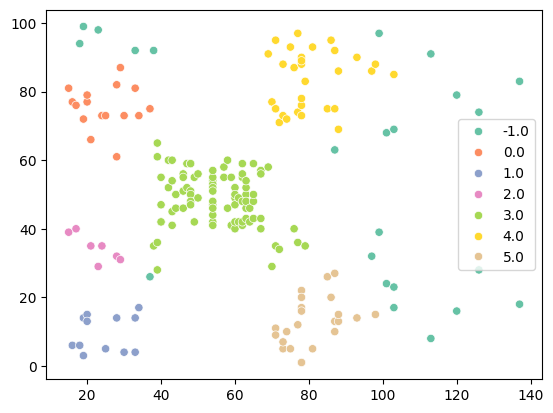

In [42]:
from sklearn.cluster import DBSCAN
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe =  Pipeline([
    ('scaler', StandardScaler()),
    ('dbscan', DBSCAN(eps=0.35, min_samples=5))
])

pipe.fit(df)

labels = pipe.named_steps['dbscan'].labels_
np.unique(labels) # datapoints with labels == -1 are noise points 

sns.scatterplot(x=df[:, 0], y=df[:, 1], hue=labels.astype(float), palette='Set2');
# as can be seen from the plot it hasn't been clustered properly in places where density is not high enough (dbscan limitation)

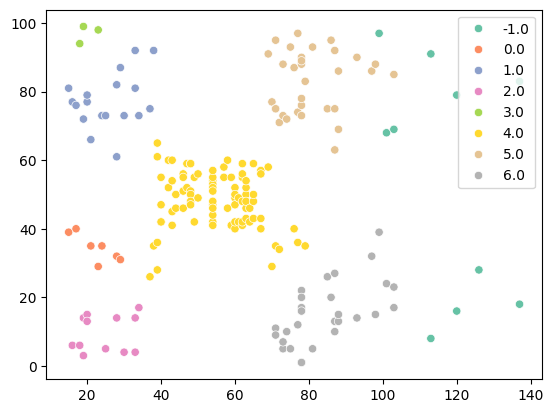

In [50]:
from sklearn.cluster import DBSCAN
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe =  Pipeline([
    ('scaler', StandardScaler()),
    ('dbscan', DBSCAN(eps=0.35, min_samples=3))
])

pipe.fit(df)

labels = pipe.named_steps['dbscan'].labels_
np.unique(labels) # datapoints with labels == -1 are noise points 

sns.scatterplot(x=df[:, 0], y=df[:, 1], hue=labels.astype(float), palette='Set2');
# changing minPts didn't help either

(787, 3)


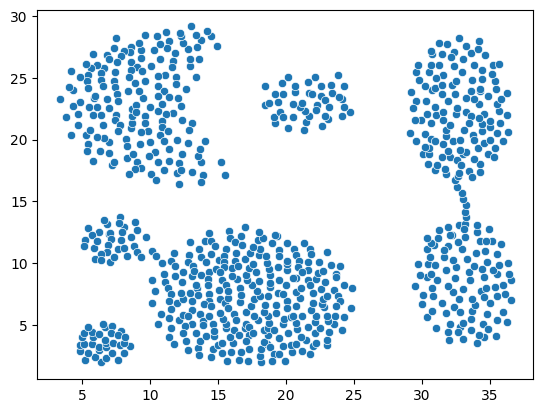

In [57]:
df = pd.read_csv('Aggregation.csv')
print(df.shape)
df = df.iloc[:, [0, 1]].values
df.shape

sns.scatterplot(x=df[:, 0], y=df[:, 1]);

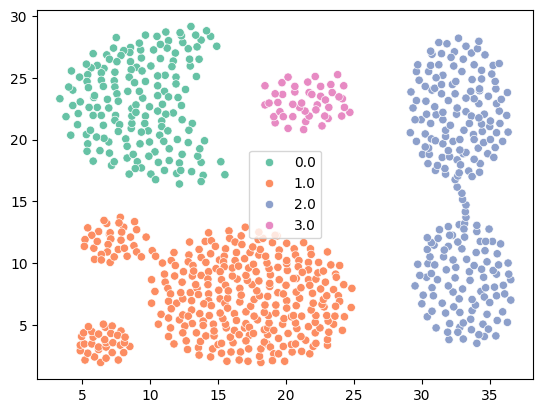

In [ ]:
pipe =  Pipeline([
    ('scaler', StandardScaler()),
    ('dbscan', DBSCAN(eps=0.35, min_samples=3))
])

pipe.fit(df)

labels = pipe.named_steps['dbscan'].labels_
np.unique(labels) # datapoints with labels == -1 are noise points 

sns.scatterplot(x=df[:, 0], y=df[:, 1], hue=labels.astype(float), palette='Set2');

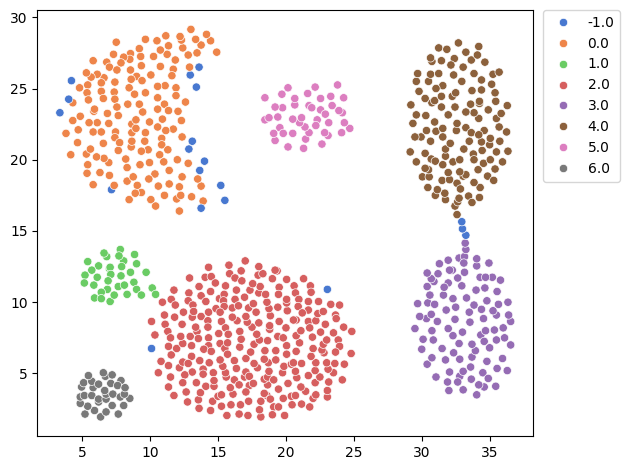

In [101]:
pipe =  Pipeline([
    ('scaler', StandardScaler()),
    ('dbscan', DBSCAN(eps=0.12, min_samples=5))
])

pipe.fit(df)

labels = pipe.named_steps['dbscan'].labels_
np.unique(labels) # datapoints with labels == -1 are noise points 

sns.scatterplot(x=df[:, 0], y=df[:, 1], hue=labels.astype(float), palette='muted')
plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.tight_layout()
plt.show()

(239, 3)


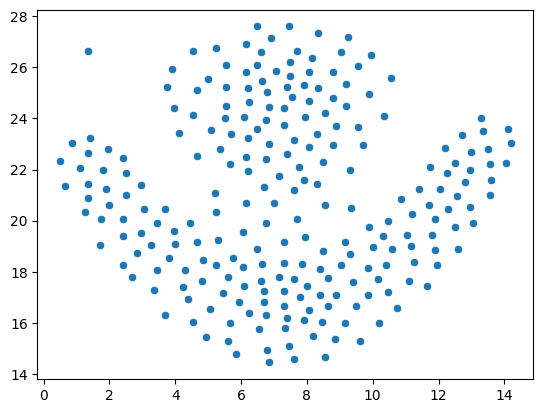

In [103]:
df = pd.read_csv('Flame.csv')
print(df.shape)
df = df.iloc[:, [0, 1]].values
df.shape

sns.scatterplot(x=df[:, 0], y=df[:, 1]);

[-1  0  1]


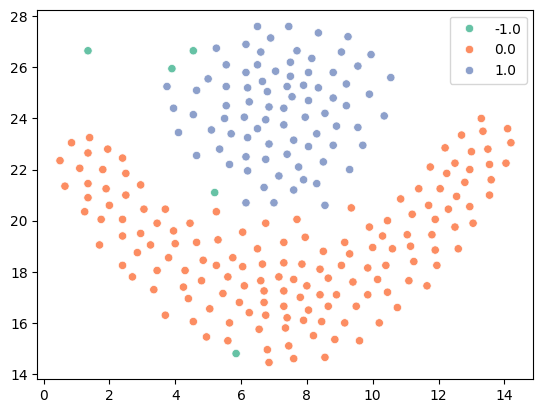

In [126]:
pipe =  Pipeline([
    ('scaler', StandardScaler()),
    ('dbscan', DBSCAN(eps=0.3, min_samples=5))
])

pipe.fit(df)

labels = pipe.named_steps['dbscan'].labels_
print(np.unique(labels)) # datapoints with labels == -1 are noise points 

sns.scatterplot(x=df[:, 0], y=df[:, 1], hue=labels.astype(float), palette='Set2');

(311, 3)


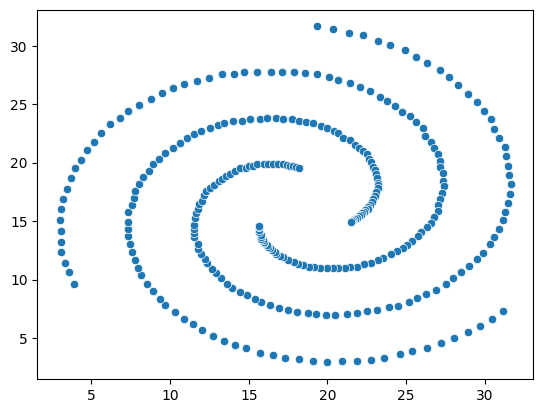

In [128]:
df = pd.read_csv('Spiral.csv')
print(df.shape)
df = df.iloc[:, [0, 1]].values
df.shape

sns.scatterplot(x=df[:, 0], y=df[:, 1]);    

[0 1 2]


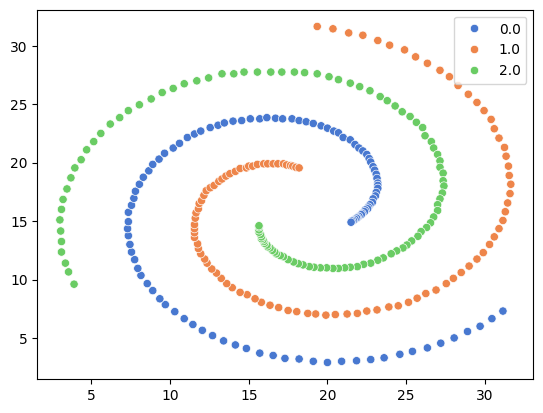

In [130]:
pipe =  Pipeline([
    ('scaler', StandardScaler()),
    ('dbscan', DBSCAN(eps=0.3, min_samples=5))
])

pipe.fit(df)

labels = pipe.named_steps['dbscan'].labels_
print(np.unique(labels)) # datapoints with labels == -1 are noise points 

sns.scatterplot(x=df[:, 0], y=df[:, 1], hue=labels.astype(float), palette='muted');

(299, 3)


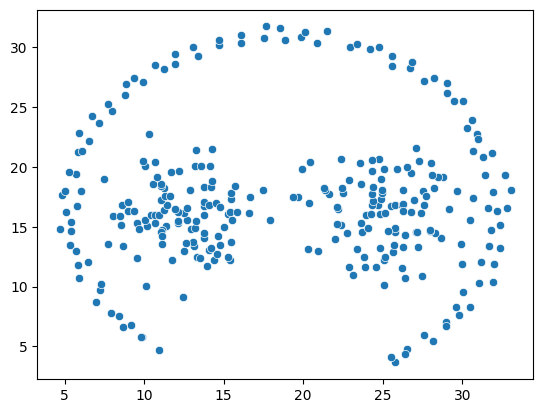

In [131]:
df = pd.read_csv('Path.csv')
print(df.shape)
df = df.iloc[:, [0, 1]].values
df.shape

sns.scatterplot(x=df[:, 0], y=df[:, 1]);    

[-1  0  1  2]


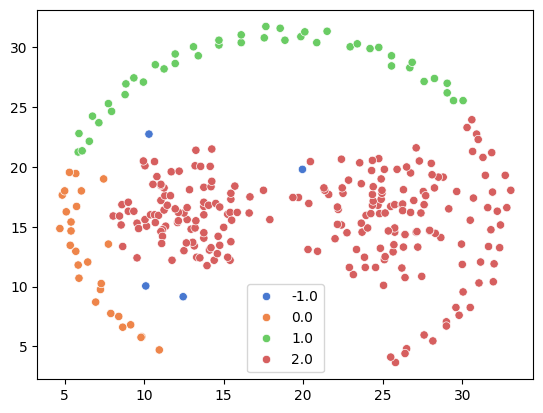

In [152]:
pipe =  Pipeline([
    ('scaler', StandardScaler()),
    ('dbscan', DBSCAN(eps=0.28, min_samples=4))
])

pipe.fit(df)

labels = pipe.named_steps['dbscan'].labels_
print(np.unique(labels)) # datapoints with labels == -1 are noise points 

sns.scatterplot(x=df[:, 0], y=df[:, 1], hue=labels.astype(float), palette='muted');

(1008, 3)


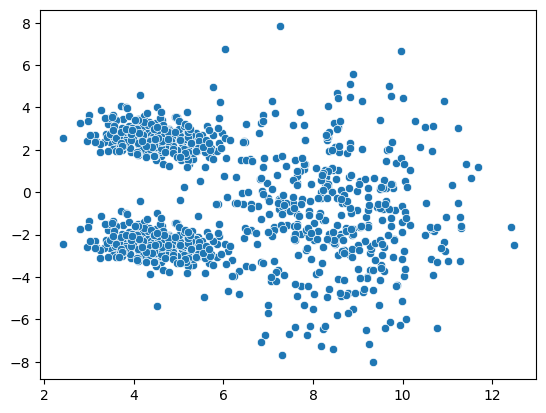

In [153]:
df = pd.read_csv('Artificial.csv')
print(df.shape)
df = df.iloc[:, [0, 1]].values
df.shape

sns.scatterplot(x=df[:, 0], y=df[:, 1]);  

[-1  0  1  2  3]


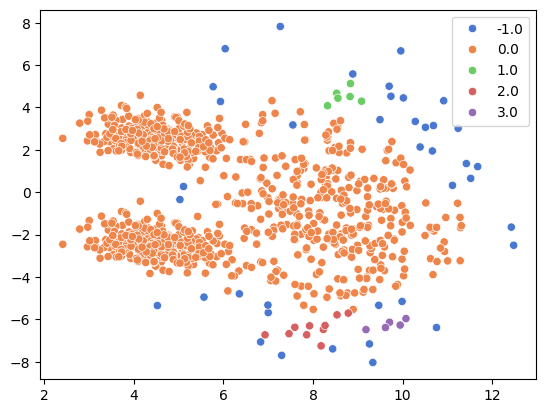

In [158]:
pipe =  Pipeline([
    ('scaler', StandardScaler()),
    ('dbscan', DBSCAN(eps=0.27, min_samples=5))
])

pipe.fit(df)

labels = pipe.named_steps['dbscan'].labels_
print(np.unique(labels)) # datapoints with labels == -1 are noise points 

sns.scatterplot(x=df[:, 0], y=df[:, 1], hue=labels.astype(float), palette='muted');

# in datasets with different cluster size and uncommon shapes, dbscan works well
# but in datasets with various density like the above, it wouldn't work well